# Modeling Climate Data - Denver Colorado #
## Overview ##
The purpose behind this project is to analyze climate data across a region of the United States.  The dataset comes from the National Oceanic and Atmospheric Administration and the region I selected was Denver, Colorado for the month of May 2019.  The data consists of the following information:
* STATION: Station the data was taken from
* NAME: Name and location of weather station
* DATE: Date of observation
* PRCP: Precipitation in inches
* TMAX: Daily maximium temperature in Farenheiht 
* TMIN: Daily minimum temperature in Farenheiht

## Tools and Data Cleaning ##
I'm going to use numpy, pandas, and Matplotlib to help me read, clean, and analyze the data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
data = '/kaggle/input/denver/denver_weather.csv'
denver_data = pd.read_csv(data)
denver_data.head()

,STATION,NAME,DATE,DAPR,DAPR_ATTRIBUTES,DASF,DASF_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,MDSF,...,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TOBS,TOBS_ATTRIBUTES,WESD,WESD_ATTRIBUTES,WESF,WESF_ATTRIBUTES
0,US1CODG0091,"CASTLE ROCK 8.2 NNW, CO US",5/1/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US1CODG0091,"CASTLE ROCK 8.2 NNW, CO US",5/2/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US1CODG0091,"CASTLE ROCK 8.2 NNW, CO US",5/3/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US1CODG0091,"CASTLE ROCK 8.2 NNW, CO US",5/4/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US1CODG0091,"CASTLE ROCK 8.2 NNW, CO US",5/5/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
denver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6891 entries, 0 to 6890
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          6891 non-null   object 
 1   NAME             6891 non-null   object 
 2   DATE             6891 non-null   object 
 3   DAPR             143 non-null    float64
 4   DAPR_ATTRIBUTES  143 non-null    object 
 5   DASF             0 non-null      float64
 6   DASF_ATTRIBUTES  0 non-null      float64
 7   MDPR             142 non-null    float64
 8   MDPR_ATTRIBUTES  142 non-null    object 
 9   MDSF             0 non-null      float64
 10  MDSF_ATTRIBUTES  0 non-null      float64
 11  PRCP             6593 non-null   float64
 12  PRCP_ATTRIBUTES  6593 non-null   object 
 13  SNOW             3845 non-null   float64
 14  SNOW_ATTRIBUTES  3845 non-null   object 
 15  SNWD             1554 non-null   float64
 16  SNWD_ATTRIBUTES  1554 non-null   object 
 17  TAVG          

Based on what I want to look at for this project, I'm going to eliminate most of columns and only keep the necessary ones

In [6]:
# filter columns
columns_to_keep = ["STATION", "NAME", "DATE", "PRCP", "TMAX", "TMIN"]
denver_data = denver_data.loc[:, columns_to_keep]
denver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6891 entries, 0 to 6890
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  6891 non-null   object 
 1   NAME     6891 non-null   object 
 2   DATE     6891 non-null   object 
 3   PRCP     6593 non-null   float64
 4   TMAX     798 non-null    float64
 5   TMIN     798 non-null    float64
dtypes: float64(3), object(3)
memory usage: 323.1+ KB


Later in this project I want to take a look at what just a few specific stations, I need to know their names first.

In [8]:
# find the names of stations
station_names = list(set(denver_data["NAME"]))
print("Station Names: ", station_names)

Station Names:  ['FOXFIELD 3.7 ESE, CO US', 'BOULDER 2.9 S, CO US', 'AURORA 12.4 SSE, CO US', 'BOULDER 2.9 ESE, CO US', 'BROOMFIELD 2.2 SE, CO US', 'AURORA 4.2 NNW, CO US', 'SEDALIA 3.5 SSE, CO US', 'EVERGREEN 5.3 S, CO US', 'ENGLEWOOD 1.4 N, CO US', 'CENTENNIAL 3.9 W, CO US', 'WHEAT RIDGE 0.6 S, CO US', 'CENTENNIAL 2.0 SW, CO US', 'LITTLETON 6.4 W, CO US', 'THORNTON 1.9 ESE, CO US', 'LITTLETON 6.6 W, CO US', 'ROLLINSVILLE 2.3 ESE, CO US', 'LAFAYETTE 0.8 WSW, CO US', 'ELIZABETH 2.1 NW, CO US', 'DENVER 2.6 SSW, CO US', 'WESTMINSTER 1.6 NE, CO US', 'DENVER 2.8 ESE, CO US', 'CASTLE ROCK 2.7 ESE, CO US', 'DENVER 6.6 W, CO US', 'DENVER 4.3 WNW, CO US', 'PARKER 1.9 E, CO US', 'CASTLE ROCK 3.3 SW, CO US', 'BROOMFIELD 3.2 NNE, CO US', 'BROOMFIELD 1.2 NE, CO US', 'THE PINERY 0.5 WNW, CO US', 'BOULDER 2.4 S, CO US', 'CASTLE ROCK 3.7 W, CO US', 'ARVADA 1.8 NE, CO US', 'BROOMFIELD 1.6 ENE, CO US', 'BRIGHTON 3 SE, CO US', 'DENVER 2.4 ESE, CO US', 'BOULDER 3.2 S, CO US', 'PARKER 9.3 ENE, CO US', 'IN

## Analysis ##
Next, I'm ready to beging some analysis by looking at the maximum and minimum temperatures of the Denver area over this month.

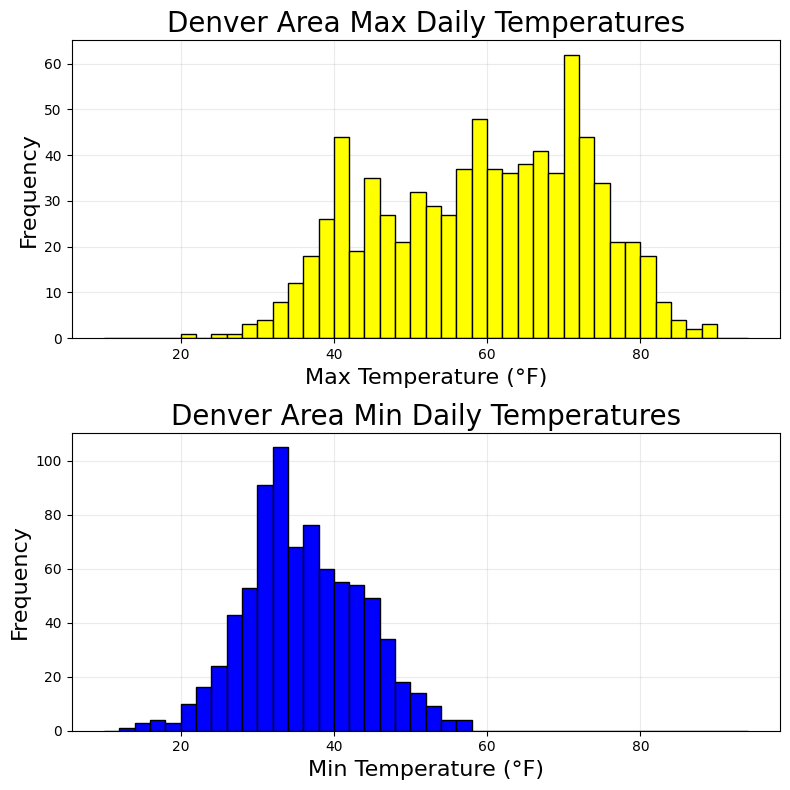

In [15]:
# Figure setup with two rows and one column
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))  # 2 rows, 1 column for stacked histograms

# Bin setup
my_bins = range(10, 95, 2)

# Plot histogram for TMAX with custom colors on the first axis
denver_data.hist(column="TMAX", ax=ax1, bins=my_bins, facecolor="yellow", edgecolor="black")
ax1.set_title("Denver Area Max Daily Temperatures", fontsize=20)
ax1.set_xlabel("Max Temperature (°F)", fontsize=16)
ax1.set_ylabel("Frequency", fontsize=16)
ax1.grid(alpha=0.25)
ax1.set_axisbelow(True)

# Plot histogram for TMIN with custom colors on the second axis
denver_data.hist(column="TMIN", ax=ax2, bins=my_bins, facecolor="blue", edgecolor="black")
ax2.set_title("Denver Area Min Daily Temperatures", fontsize=20)
ax2.set_xlabel("Min Temperature (°F)", fontsize=16)
ax2.set_ylabel("Frequency", fontsize=16)
ax2.grid(alpha=0.25)
ax2.set_axisbelow(True)

# Adjust layout to prevent overlap
plt.tight_layout()

Next, I'm going to pull the min and max temperatures for three different locations in the denver area.  These sites were selected because they have the most available information:
WHEAT RIDGE 2, CO US
GROSS RESERVOIR, CO US
ECHO LAKE, CO US


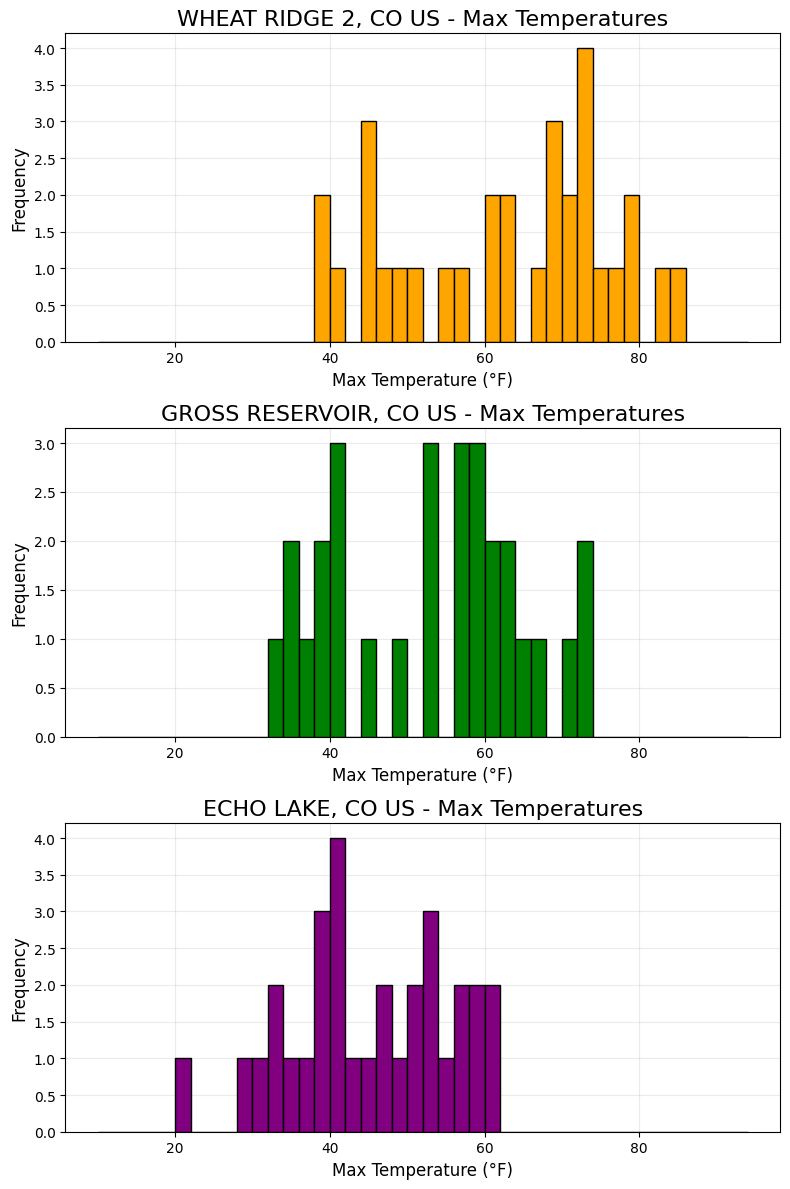

In [18]:
# Define the station names and colors for each histogram
station_names = ["WHEAT RIDGE 2, CO US", "GROSS RESERVOIR, CO US", "ECHO LAKE, CO US"]
colors = ["orange", "green", "purple"]  # Distinct colors for each station

# Filter the DataFrame for rows where NAME is in the specified station names
filtered_data = denver_data[denver_data['NAME'].isin(station_names)]

# Figure setup with three rows (one for each station) and one column
fig, axs = plt.subplots(3, 1, figsize=(8, 12))  # 3 rows, 1 column for stacked histograms

# Bin setup
my_bins = range(10, 95, 2)

# Loop through each station name, color, and corresponding axis
for ax, station_name, color in zip(axs, station_names, colors):
    # Filter data for the current station
    station_data = filtered_data[filtered_data['NAME'] == station_name]
    
    # Plot histogram for TMAX for the current station with the specified color
    station_data.hist(column="TMAX", ax=ax, bins=my_bins, facecolor=color, edgecolor="black")
    
    # Set title and labels for the subplot
    ax.set_title(f"{station_name} - Max Temperatures", fontsize=16)
    ax.set_xlabel("Max Temperature (°F)", fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)
    
    # Grid styling
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)

# Adjust layout to prevent overlap
plt.tight_layout()


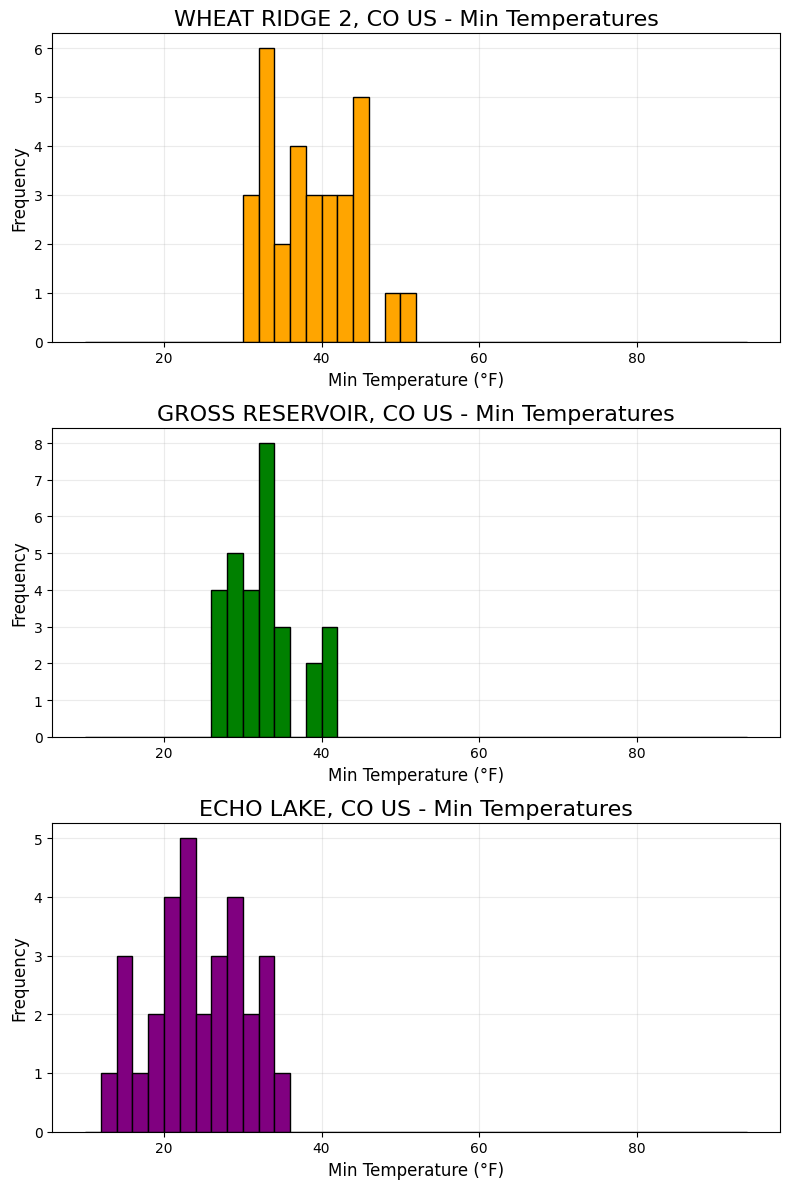

In [19]:
# Define the station names and colors for each histogram
station_names = ["WHEAT RIDGE 2, CO US", "GROSS RESERVOIR, CO US", "ECHO LAKE, CO US"]
colors = ["orange", "green", "purple"]  # Distinct colors for each station

# Filter the DataFrame for rows where NAME is in the specified station names
filtered_data = denver_data[denver_data['NAME'].isin(station_names)]

# Figure setup with three rows (one for each station) and one column
fig, axs = plt.subplots(3, 1, figsize=(8, 12))  # 3 rows, 1 column for stacked histograms

# Bin setup
my_bins = range(10, 95, 2)

# Loop through each station name, color, and corresponding axis
for ax, station_name, color in zip(axs, station_names, colors):
    # Filter data for the current station
    station_data = filtered_data[filtered_data['NAME'] == station_name]
    
    # Plot histogram for TMAX for the current station with the specified color
    station_data.hist(column="TMIN", ax=ax, bins=my_bins, facecolor=color, edgecolor="black")
    
    # Set title and labels for the subplot
    ax.set_title(f"{station_name} - Min Temperatures", fontsize=16)
    ax.set_xlabel("Min Temperature (°F)", fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)
    
    # Grid styling
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)

# Adjust layout to prevent overlap
plt.tight_layout()


Now that there is a baseline for temperatures, I want to take a look at precipitation.  I'll use the same locations but start with Denver as a whole:

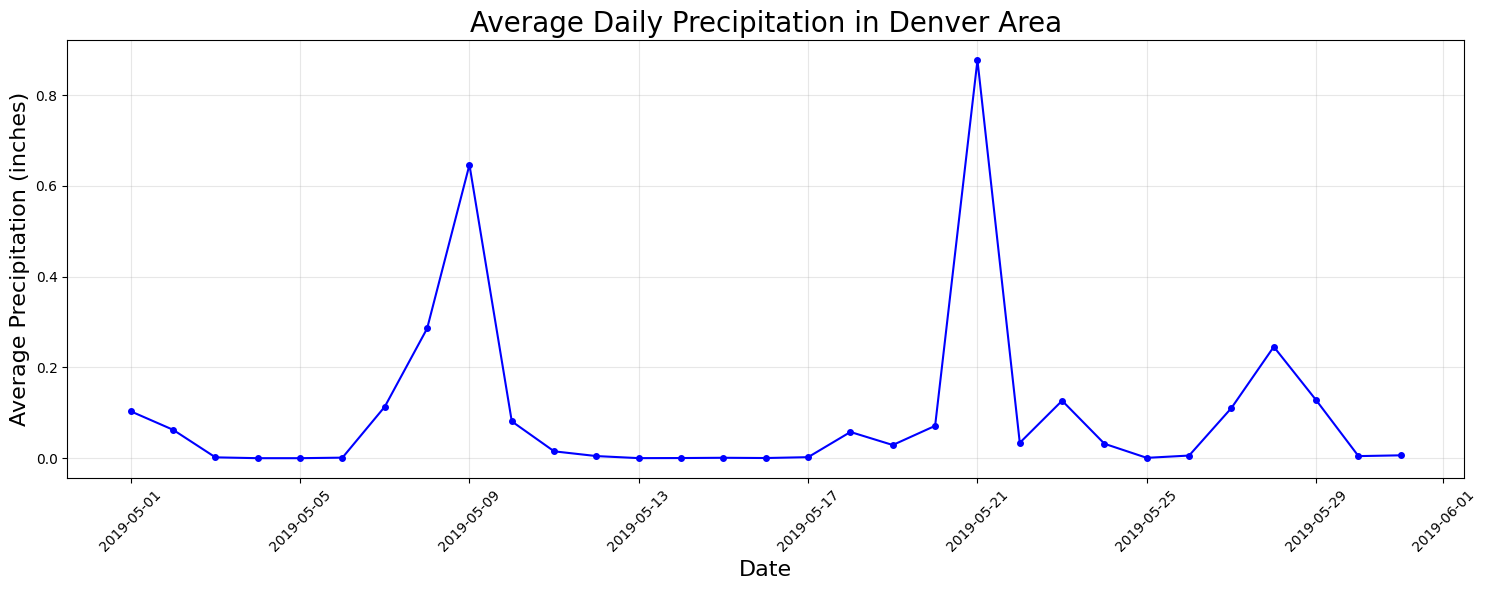

In [29]:
# Ensure DATE column is in datetime format
denver_data["DATE"] = pd.to_datetime(denver_data["DATE"])

# Group by DATE and calculate the mean of PRCP (precipitation)
average_precipitation = denver_data.groupby("DATE")["PRCP"].mean().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(15, 6))

# Plotting average precipitation over time
ax.plot(average_precipitation["DATE"], average_precipitation["PRCP"], color="blue", marker="o", linestyle="-", markersize=4)

# Add a title and axis labels
ax.set_title("Average Daily Precipitation in Denver Area", fontsize=20)
ax.set_xlabel("Date", fontsize=16)
ax.set_ylabel("Average Precipitation (inches)", fontsize=16)

# Improve the x-axis date formatting for readability
plt.xticks(rotation=45)
plt.grid(alpha=0.3)

# Show plot
plt.tight_layout()
plt.show()

Now lets look at how this looks at three specific stations.

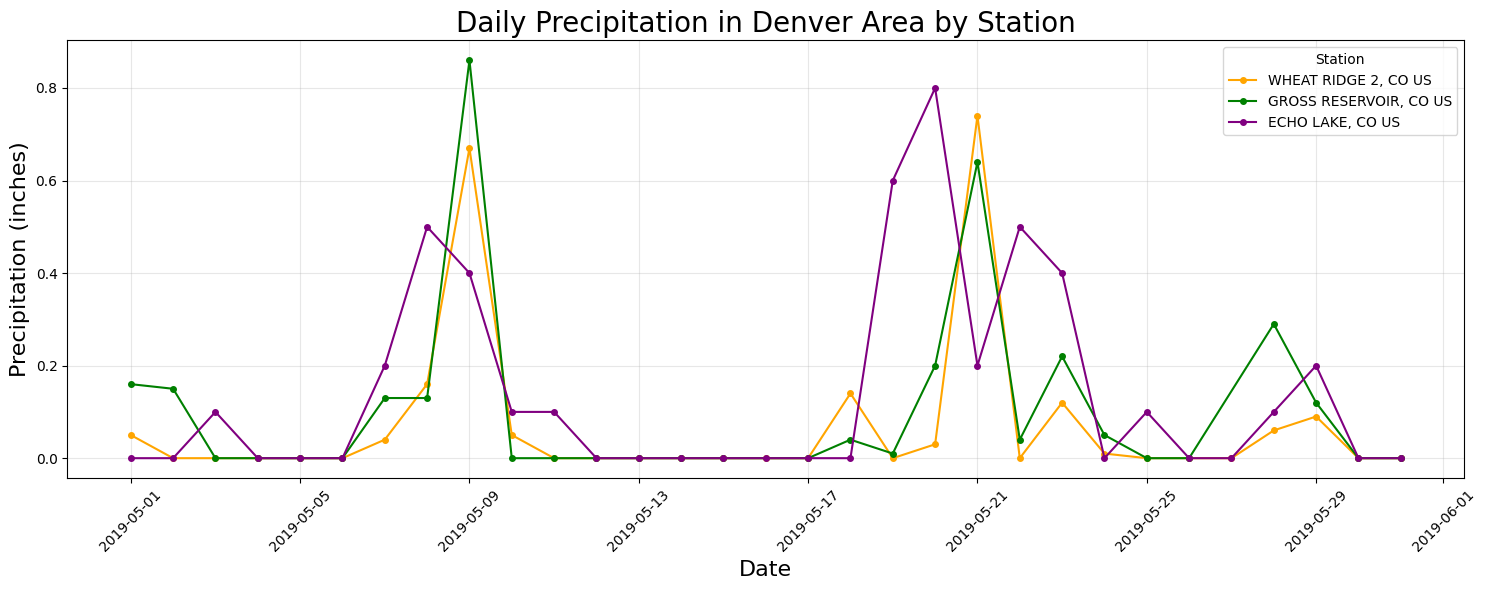

In [32]:
# Convert DATE column to datetime format
denver_data["DATE"] = pd.to_datetime(denver_data["DATE"])

# Define the station names to filter
station_names = ["WHEAT RIDGE 2, CO US", "GROSS RESERVOIR, CO US", "ECHO LAKE, CO US"]

# Filter the DataFrame for rows where NAME is in the specified station names
filtered_data = denver_data[denver_data['NAME'].isin(station_names)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 6))

# Plot each station's data with unique colors
for station_name, color in zip(station_names, ["orange", "green", "purple"]):
    # Filter data for the current station
    station_data = filtered_data[filtered_data['NAME'] == station_name]
    
    # Plot the PRCP for the current station
    ax.plot(station_data["DATE"], station_data["PRCP"], marker="o", linestyle="-", markersize=4, label=station_name, color=color)

# Add a title and axis labels
ax.set_title("Daily Precipitation in Denver Area by Station", fontsize=20)
ax.set_xlabel("Date", fontsize=16)
ax.set_ylabel("Precipitation (inches)", fontsize=16)

# Add a legend to distinguish each station
ax.legend(title="Station")

# Improve the x-axis date formatting for readability
plt.xticks(rotation=45)
plt.grid(alpha=0.3)

# Show plot
plt.tight_layout()
plt.show()

Looking at this as a box and whisker plot:

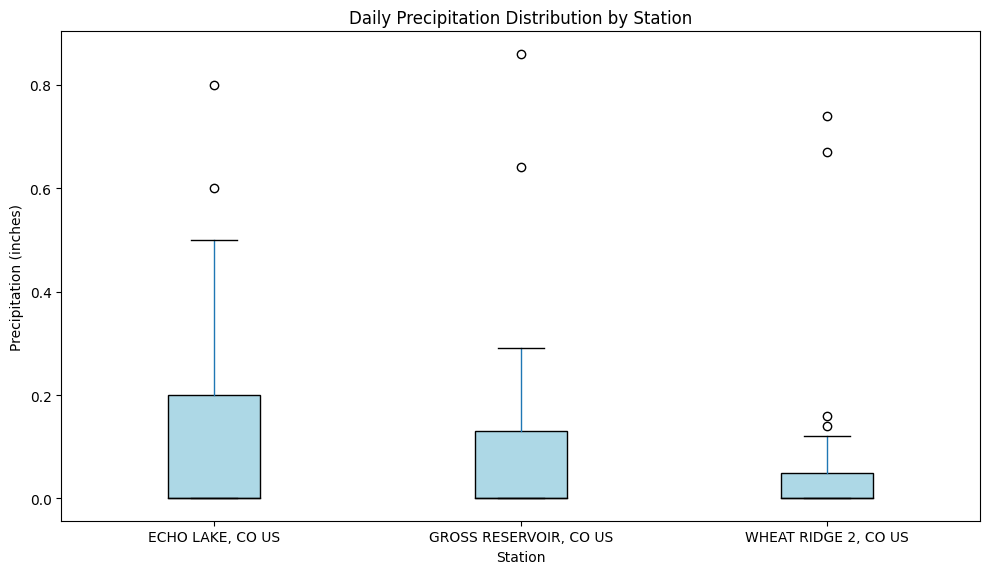

In [33]:
# Convert DATE column to datetime format (if not already done)
denver_data["DATE"] = pd.to_datetime(denver_data["DATE"])

# Define the station names to filter
station_names = ["WHEAT RIDGE 2, CO US", "GROSS RESERVOIR, CO US", "ECHO LAKE, CO US"]

# Filter the DataFrame for rows where NAME is in the specified station names
filtered_data = denver_data[denver_data['NAME'].isin(station_names)]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Create a box plot with PRCP data for each station
filtered_data.boxplot(column="PRCP", by="NAME", ax=ax, grid=False, patch_artist=True,
                      boxprops=dict(facecolor="lightblue"), medianprops=dict(color="black"))

# Set title and axis labels
ax.set_title("Daily Precipitation Distribution by Station")
ax.set_xlabel("Station")
ax.set_ylabel("Precipitation (inches)")

# Remove the automatic "Boxplot grouped by NAME" title created by pandas
plt.suptitle("")

# Show plot
plt.tight_layout()
plt.show()

The next thing I'm going to look at is groundwater levels.  Due to the limitations of this dataset from NOAA I am going to be using a dataset from the USGS (United States Geological Survey) National Water Dashboard.  I cannot export this groundwater data unfortunatley but I can use the dashboard to look at some visualizations.

I used the same time period as before, May of 2019 in Denver.  
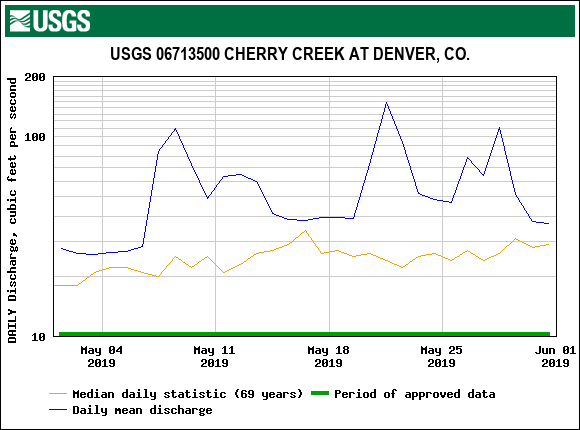

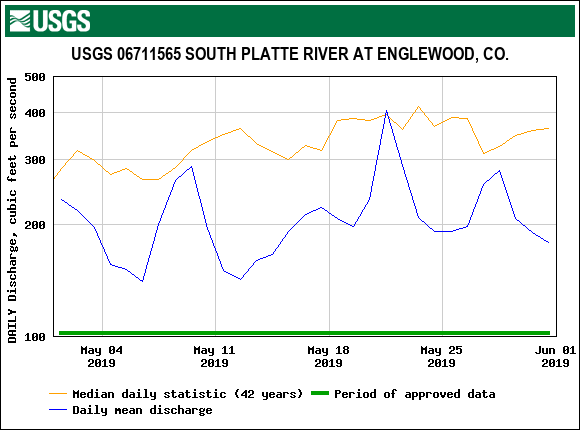

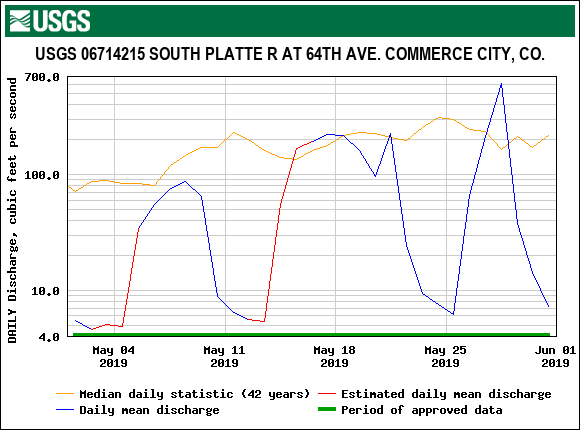

The three graphs above are from the Denver region and indicate very different groundwater levels in the area.  

## Conclusions ##
May is an interesting month because it's usually the end of spring but in a high elevation area like Denver there is still some wintery days mixed in.  The high elevations can also mean very cold and very hot temperatures in the same month.  This can be dangerous when coupling it with climate change.  

Starting with the maximum and minimum temperatures experienced over the course of May it is obvious that there are dramatic swings in temperature which can make it very difficult for plant and animal life to flourish.  Another problem that arises is with extreme heat and extreme cold is it's easy for water to freeze over.  In the mountains of Denver, the low temperatures will allow snow and ice to stay preserved for a long period of time.  However, the extreme heat that will come in the same month will get that snow and ice to quickly thaw and melt across denver and create floods. 

When looking at the amount of precipitation over the course of the month there's more concerning trends.  There was very little rain and snowfall in the Denver area for the month of May.  This will inevitably lead to droughts and a dry summer.  The dry summer is bad because that will lead to an increased risk of wildfires that could happen in the coming months.  

The most daming piece of evidence to suggest an increasted chance of droughts or wildfires is the amount of groundwater for the month of May.  
Cherry Creek experienced an above average amount of water discharge for the month but the historical average for this month is very low so it's not hard to beat in a random month. Taking a look at the other two areas of Englewood and Commerce City you can see that they are both below their historical average which is concerning because it can indicate signs of incoming droughts and wildfires.  

Climate change exactribates the extremes on earth.  More wildfires, droughts, hot days, and cold days are being experienced all over earth and in some places more than others.  Denver and the American West coast are one of those unique areas because of their elevation and geographical location.  The evidence presented in this project confirms that the extremes these areas can experience are only going to incrcease.

## Citations ##
For help creating graphs in MaplotLib: https://matplotlib.org/stable/gallery/index.html

For help getting the data together: https://www.noaa.gov/

For the water table information: https://dashboard.waterdata.usgs.gov/app/nwd/en/?aoi=default